Linear Optics Phase Calculation for the BELLA Laser Experiment

Boaz Nash, _RadiaSoft LLC_

#### Imports and definitions

In [1]:
import numpy as np

import matplotlib.pyplot as plt

from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

$$M_T = M_d \bar M_c M_c^{-1} M_d^{-1}$$

#### Calculate alpha over range of n2 values

In [2]:
# define n0
n0 = 1.76
#n2=1.6e-3 #cm^-2
#n2 = 16 #m^-2 from Fenics calculation
#n2 = 15.38
# n2 = 11.76
# n2 = 1.75


In [3]:
# define beam size, wavelength, and calculate initial moments

#sigmax = 64e-6 #rms beam size [m]
#sigmax = 1e-3
w0=1.3e-3 #beamsize at WFS in [m] from the fit in data02
#sigma = 0.5 w0
sigmax = 0.5*w0
lambda_rad = 799.89e-9 #wavelength [m]
Zr = np.pi*w0**2/lambda_rad
sigtheta = lambda_rad/(4*np.pi*sigmax) #rms divergence [rad]

sigmai = np.array( [[sigmax**2, 0], [0, sigtheta**2] ] ) 

print("Rayleigh range[m]",Zr)
print("sigma_theta[rad]",sigtheta)
print("Sigma matrix without pumping:",sigmai)
# print("sigmaf:",sigmaf)

Rayleigh range[m] 6.637527140690282
sigma_theta[rad] 9.792803648444322e-05
Sigma matrix without pumping: [[4.22500000e-07 0.00000000e+00]
 [0.00000000e+00 9.58990033e-09]]


In [4]:
flen_front = 4.4 #measured front of crystal focal length from thermal bulging
flen_back = 6.2 #measured back of crystal focal length from thermal bulging
f = flen_back

Lc = 0.025
#Ld = 0.5
Ld = 0.5
Matcinv = np.array( [[ 1, -Lc/n0], [0, 1]])


In [5]:
# define array of n2 values and calculate corresponding alpha values

n_n2 = 40
n2_min = 0.5
n2_max = 20
n2_vals = np.linspace(n2_min, n2_max, n_n2)

alpha_vals = []

for n2 in n2_vals:

    
    gamma = np.sqrt(n2/n0)
    A = np.cos(gamma*Lc)
    B = 1/(n0 * gamma) * np.sin(gamma*Lc)
    C = -n0 * gamma * np.sin(gamma * Lc)
    D = np.cos(gamma*Lc)
    Matcbar = np.array( [[ A, B], [C, D]] )
    Matd = np.array( [[ 1, Ld], [0, 1]] )
    Matdinv = np.array( [[ 1, -Ld], [0, 1]] )
    Mat_tl = np.array( [[ 1, 0], [-1/f, 1]] )
    Mat_tl_front = np.array( [[ 1, 0], [-1/flen_front, 1]] )
    Mat_tlinv = np.array( [[ 1, 0], [1/f, 1]] )
    MatId = np.array( [[1, 0], [0, 1]] )
    Mattot0 = np.matmul(np.matmul(np.matmul(Matd,Matcbar),Matcinv),Matdinv)
    #Mattot1 = np.matmul(np.matmul(np.matmul(np.matmul(np.matmul(Matd,Mat_tl),Matcbar),Matcinv),Mat_tlinv),Matdinv)
    #Mattot1 = np.matmul(np.matmul(np.matmul(np.matmul(np.matmul(Matd,Mat_tl),Matcbar),Matcinv),Mat_tl),Matdinv)
    Mattot1 = np.matmul(np.matmul(np.matmul(np.matmul(np.matmul(np.matmul(Matd,Mat_tl),Matcbar),Mat_tl_front),Matcinv),Mat_tl),Matdinv)

    # print(gamma)
    # print(Mattot0)
    printmd('$M_{ABCD}$: %s' %(Mattot0))
    Mattot = Mattot0
    
    sigmaf = np.matmul(np.matmul(Mattot, sigmai),np.transpose(Mattot))
    
    alpha = -0.5* sigmaf[0,1]/sigmaf[0,0]
    print('n2: %g, alpha: %g' %(n2, alpha))
    
    alpha_vals.append(alpha)

$M_{ABCD}$: [[ 0.99366141  0.00321452]
 [-0.01249963  1.00633859]]

n2: 0.5, alpha: 0.0062525


$M_{ABCD}$: [[ 0.98732319  0.00642886]
 [-0.02499852  1.0126768 ]]

n2: 1, alpha: 0.0125839


$M_{ABCD}$: [[ 0.98098534  0.009643  ]
 [-0.03749667  1.01901464]]

n2: 1.5, alpha: 0.0189958


$M_{ABCD}$: [[ 0.97464787  0.01285695]
 [-0.04999408  1.02535209]]

n2: 2, alpha: 0.0254897


$M_{ABCD}$: [[ 0.96831076  0.01607072]
 [-0.06249075  1.03168917]]

n2: 2.5, alpha: 0.032067


$M_{ABCD}$: [[ 0.96197403  0.01928429]
 [-0.07498668  1.03802587]]

n2: 3, alpha: 0.0387296


$M_{ABCD}$: [[ 0.95563768  0.02249767]
 [-0.08748188  1.04436219]]

n2: 3.5, alpha: 0.0454789


$M_{ABCD}$: [[ 0.94930169  0.02571087]
 [-0.09997633  1.05069814]]

n2: 4, alpha: 0.0523167


$M_{ABCD}$: [[ 0.94296608  0.02892387]
 [-0.11247004  1.05703371]]

n2: 4.5, alpha: 0.0592448


$M_{ABCD}$: [[ 0.93663084  0.03213668]
 [-0.12496301  1.0633689 ]]

n2: 5, alpha: 0.0662649


$M_{ABCD}$: [[ 0.93029597  0.0353493 ]
 [-0.13745525  1.06970371]]

n2: 5.5, alpha: 0.0733789


$M_{ABCD}$: [[ 0.92396148  0.03856173]
 [-0.14994674  1.07603814]]

n2: 6, alpha: 0.0805886


$M_{ABCD}$: [[ 0.91762736  0.04177398]
 [-0.16243749  1.0823722 ]]

n2: 6.5, alpha: 0.087896


$M_{ABCD}$: [[ 0.91129361  0.04498603]
 [-0.17492751  1.08870588]]

n2: 7, alpha: 0.095303


$M_{ABCD}$: [[ 0.90496023  0.04819789]
 [-0.18741678  1.09503918]]

n2: 7.5, alpha: 0.102812


$M_{ABCD}$: [[ 0.89862722  0.05140956]
 [-0.19990532  1.1013721 ]]

n2: 8, alpha: 0.110424


$M_{ABCD}$: [[ 0.89229459  0.05462104]
 [-0.21239311  1.10770465]]

n2: 8.5, alpha: 0.118143


$M_{ABCD}$: [[ 0.88596233  0.05783233]
 [-0.22488017  1.11403682]]

n2: 9, alpha: 0.125969


$M_{ABCD}$: [[ 0.87963044  0.06104343]
 [-0.23736648  1.12036861]]

n2: 9.5, alpha: 0.133906


$M_{ABCD}$: [[ 0.87329893  0.06425434]
 [-0.24985206  1.12670002]]

n2: 10, alpha: 0.141956


$M_{ABCD}$: [[ 0.86696778  0.06746506]
 [-0.2623369   1.13303106]]

n2: 10.5, alpha: 0.150121


$M_{ABCD}$: [[ 0.86063701  0.07067559]
 [-0.274821    1.13936172]]

n2: 11, alpha: 0.158403


$M_{ABCD}$: [[ 0.85430661  0.07388593]
 [-0.28730436  1.145692  ]]

n2: 11.5, alpha: 0.166806


$M_{ABCD}$: [[ 0.84797659  0.07709608]
 [-0.29978698  1.1520219 ]]

n2: 12, alpha: 0.175331


$M_{ABCD}$: [[ 0.84164693  0.08030604]
 [-0.31226886  1.15835143]]

n2: 12.5, alpha: 0.183982


$M_{ABCD}$: [[ 0.83531765  0.08351581]
 [-0.32475     1.16468057]]

n2: 13, alpha: 0.192761


$M_{ABCD}$: [[ 0.82898874  0.08672539]
 [-0.3372304   1.17100935]]

n2: 13.5, alpha: 0.201671


$M_{ABCD}$: [[ 0.8226602   0.08993478]
 [-0.34971006  1.17733774]]

n2: 14, alpha: 0.210716


$M_{ABCD}$: [[ 0.81633204  0.09314398]
 [-0.36218899  1.18366575]]

n2: 14.5, alpha: 0.219897


$M_{ABCD}$: [[ 0.81000424  0.09635299]
 [-0.37466717  1.18999339]]

n2: 15, alpha: 0.229218


$M_{ABCD}$: [[ 0.80367682  0.09956181]
 [-0.38714461  1.19632065]]

n2: 15.5, alpha: 0.238682


$M_{ABCD}$: [[ 0.79734978  0.10277044]
 [-0.39962132  1.20264753]]

n2: 16, alpha: 0.248294


$M_{ABCD}$: [[ 0.7910231   0.10597888]
 [-0.41209729  1.20897404]]

n2: 16.5, alpha: 0.258055


$M_{ABCD}$: [[ 0.7846968   0.10918712]
 [-0.42457251  1.21530017]]

n2: 17, alpha: 0.267969


$M_{ABCD}$: [[ 0.77837086  0.11239518]
 [-0.437047    1.22162592]]

n2: 17.5, alpha: 0.278041


$M_{ABCD}$: [[ 0.7720453   0.11560305]
 [-0.44952075  1.22795129]]

n2: 18, alpha: 0.288274


$M_{ABCD}$: [[ 0.76572012  0.11881073]
 [-0.46199376  1.23427629]]

n2: 18.5, alpha: 0.298671


$M_{ABCD}$: [[ 0.7593953   0.12201822]
 [-0.47446603  1.24060091]]

n2: 19, alpha: 0.309237


$M_{ABCD}$: [[ 0.75307086  0.12522552]
 [-0.48693756  1.24692515]]

n2: 19.5, alpha: 0.319976


$M_{ABCD}$: [[ 0.74674679  0.12843263]
 [-0.49940835  1.25324901]]

n2: 20, alpha: 0.330891


#### Calculate alpha via overall ABCD matrix

In [6]:
# define ABCD matrix from values calculated by multiplying component ABCD matrices in thermal simulation [cm]
# A = 9.99685237e-01
# B = 1.42040659 / 1e2        # divide by 1e2 to convert cm to m
# C = -3.20164929e-04 * 1e2    # multiply by 1e2 to convert 1/cm to 1/m
# D = 9.99859955e-01

# from thermal simulation (K_c = 0.33 [W/cm/K], standard BELLA params) 
A = 9.98822400e-01
B = 1.42013835 / 1e2
C = -1.19776239e-03 * 1e2
D = 9.99475995e-01

# # from thermal simulation (K_c = 0.14 [W/cm/K], standard BELLA params - yields alpha_pi in agreement with alpha_pi_JVT) 
# A = 0.99721995
# B = 1.41960963 / 1e2
# C = -0.00282665 * 1e2
# D = 0.99876387

# A = 0.99765495
# B = 1.41975385 / 1e2
# C = -0.0023775 * 1e2
# D = 0.99896716

# A = 0.97544003
# B = 0.01245522
# C = -0.04843195
# D = 1.02455993

print('det(ABCD): %g' %(A*D - B*C))

flen_front = 5                       # focal length [m] of lens at crystal entrance face
flen_back = flen_front / 12          # focal length [m] of lens at crystal end face

Matcbar = np.array( [[ A, B], [C, D]] )                       # propagation through crystal with focusing
Matd = np.array( [[ 1, Ld], [0, 1]] )                         # drift (distance between crystal and wfs)
Matdinv = np.array( [[ 1, -Ld], [0, 1]] )                     # inverse drift (distance between crystal and wfs)
Mat_tl_back = np.array( [[ 1, 0], [-1/flen_back, 1]] )        # thin lens due to mech stress at crystal end face
Mat_tl_front = np.array( [[ 1, 0], [-1/flen_front, 1]] )      # thin lens due to mech stress at crystal entrance face
Mat_tl_back_inv = np.array( [[ 1, 0], [1/flen_back, 1]] )           # inverse of thin lens due to mech stress at crystal end face
MatId = np.array( [[1, 0], [0, 1]] )                          # identity matrix
Mattot0 = np.matmul(np.matmul(np.matmul(Matd,Matcbar),Matcinv),Matdinv)
#Mattot1 = np.matmul(np.matmul(np.matmul(np.matmul(np.matmul(Matd,Mat_tl),Matcbar),Matcinv),Mat_tlinv),Matdinv)
#Mattot1 = np.matmul(np.matmul(np.matmul(np.matmul(np.matmul(Matd,Mat_tl),Matcbar),Matcinv),Mat_tl),Matdinv)
Mattot1 = np.matmul(np.matmul(np.matmul(np.matmul(np.matmul(np.matmul(Matd,Mat_tl_back),Matcbar),Mat_tl_front),Matcinv),Mat_tl_back_inv),Matdinv)

# print(gamma)
# print(Mattot0)
Mattot = Mattot1

sigmaf = np.matmul(np.matmul(Mattot, sigmai),np.transpose(Mattot))

alpha_abcd = -0.5* sigmaf[0,1]/sigmaf[0,0]
print('alpha_abcd: %g' %(alpha_abcd))

det(ABCD): 1
alpha_abcd: 0.176284


#### Calculate alpha via complex beam parameter, q

In [7]:
#Compute initial q
lambda_rad = 799.89e-9 #wavelength [m]
lambdabar = lambda_rad/(2*np.pi)
k = 1/lambdabar
w0 = 1.64e-3 #beamsize at WFS in [m]
sigmar = 0.5*w0
q0 = 1j*np.pi*w0**2/lambda_rad
A = Mattot[0,0]
B = Mattot[0,1]
C = Mattot[1,0]
D = Mattot[1,1]
qf = (A*q0 + B)/(C*q0 + D)
print(qf)

(-2.476591024703272+0.9248405310713015j)


In [8]:
bf = k*np.real(1/qf)
alpha_q = -lambda_rad * bf/(4*np.pi)
print('alpha_q: %g' %alpha_q)

alpha_q: 0.177182


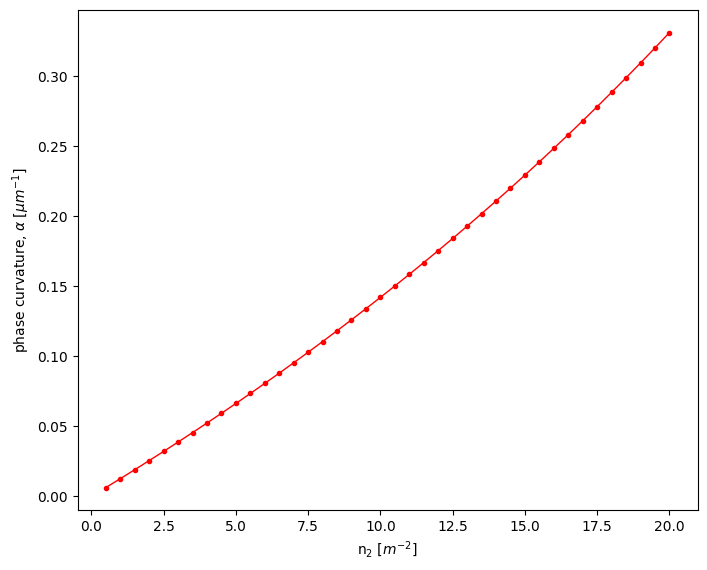

In [9]:
# plot alpha vs n2
fig = plt.figure(figsize=(8,6.5))
ax = fig.gca()
ax.plot(n2_vals, alpha_vals,'r.-', lw = 1)
ax.set_xlabel(r'n$_2$ [$m^{-2}$]')
ax.set_ylabel(r'phase curvature, $\alpha$ [$\mu m^{-1}$]')
fig.show()

In [10]:
# measured focal lengths (as of 02012023) - convert to alpha values
f_pi_jvt = 2.94       # focal length [m]
f_sigma_jvt = 4.76    # focal length [m]

alpha_pi_jvt = 1 / (2 * f_pi_jvt)
alpha_sigma_jvt = 1 / (2 * f_sigma_jvt)

print('alpha_pi_jvt: %g [1/m], alpha_sigma_jvt: %g [1/m]' %(alpha_pi_jvt, alpha_sigma_jvt))
print('alpha_pi_abcd: %g [1/m]' %(alpha_abcd))

alpha_pi_jvt: 0.170068 [1/m], alpha_sigma_jvt: 0.105042 [1/m]
alpha_pi_abcd: 0.176284 [1/m]


In [11]:
f_pi_abcd = 1 / 2 / alpha_abcd

print('f_pi_jvt: %g [m], f_pi_abcd: %g [m]' %(f_pi_jvt, f_pi_abcd))

f_pi_jvt: 2.94 [m], f_pi_abcd: 2.83633 [m]


#### Calculate radius of curvature and displacement required for thin lens via lens maker's equation - focal length agreement

\begin{equation}
\frac{1}{f} = \frac{n_l - n_{air}}{n_{air}} \left(\frac{1}{R_1} - \frac{1}{R_2} \right)
\end{equation}
where $R_1$ and $R_2$ are the front back radii of curvature respectively.

Now let $R_2 \rightarrow \infty$, then
\begin{equation}
\frac{1}{f} = \frac{n_l - n_{air}}{R_1 n_{air}}
\end{equation}


For a more precise calculation, we may consider the more general formula,
\begin{equation}
\frac{1}{f} = (n_l - 1) \left[\frac{1}{R_1} - \frac{1}{R_2} + \frac{(n_l-1)d}{n_l R_1 R_2} \right]
\end{equation}
where d is the crystal length.

In [12]:
# define inputs for len's makers formula
n_l = 1.75991         # index of refraction (n_0) for Ti-Sapphire
n_air = 1.00029       # index of refraction for air

# calculate radius of curvature for displacement at crystal entrance
R_1 = flen_front * (n_l - n_air) / n_air

printmd(r'$R_1$ = %g [m]' %(R_1))

$R_1$ = 3.797 [m]

\begin{equation}
x = R - \sqrt{R^2 - r^2} 
\end{equation}

In [13]:
# calculate displacement at crystal entrance
r_crystal = 0.005     # crystal radius [m]
disp_ent = R_1 - np.sqrt(R_1**2 - r_crystal**2)
printmd(r'diseplacement at crystal entrance: %g [$\mu m$]' %(disp_ent*1e6))

diseplacement at crystal entrance: 3.29208 [$\mu m$]